In [4]:
import pandas as pd
import numpy as np

from sklearn.cluster import MiniBatchKMeans # instead of KMeans to speed up the process (for large datasets)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [6]:
# Read the data
df = pd.read_csv('bbc-text.csv')
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [7]:
# add labels with label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['category'])
df.head()

,category,text,label
0,tech,tv future in the hands of viewers with home th...,4
1,business,worldcom boss left books alone former worldc...,0
2,sport,tigers wary of farrell gamble leicester say ...,3
3,sport,yeading face newcastle in fa cup premiership s...,3
4,entertainment,ocean s twelve raids box office ocean s twelve...,1


In [8]:
# print value counts for each label
df['label'].value_counts()

3    511
0    510
2    417
4    401
1    386
Name: label, dtype: int64

In [9]:
# feature extraction
vec = TfidfVectorizer(stop_words='english')
vec.fit(df.text.values)
features = vec.transform(df.text.values)

In [10]:
cls = MiniBatchKMeans(n_clusters=5, random_state=0)
cls.fit(features)

MiniBatchKMeans(n_clusters=5, random_state=0)

In [11]:
# predict clusters labels for new data
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([4, 0, 2, ..., 1, 3, 2], dtype=int32)

In [12]:
# vissualization
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2 Dimensions
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

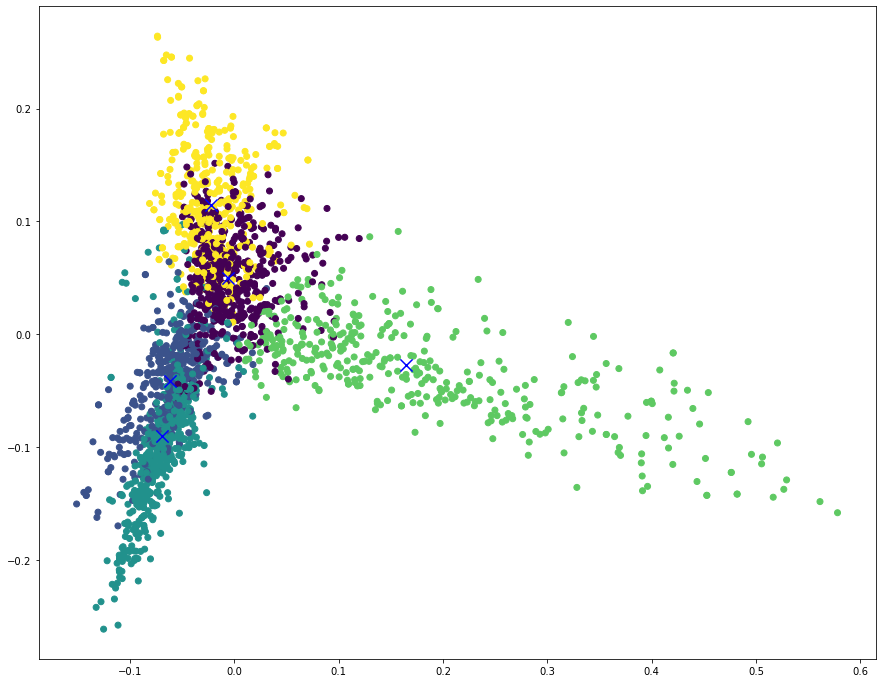

In [15]:
# specify image size
plt.figure(figsize=(15, 12))
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features), cmap='viridis')
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [16]:
# evaluation

from sklearn.metrics import homogeneity_score
homogeneity_score(df['label'], cls.predict(features))

0.6588570004006468

In [17]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.010842955311182945